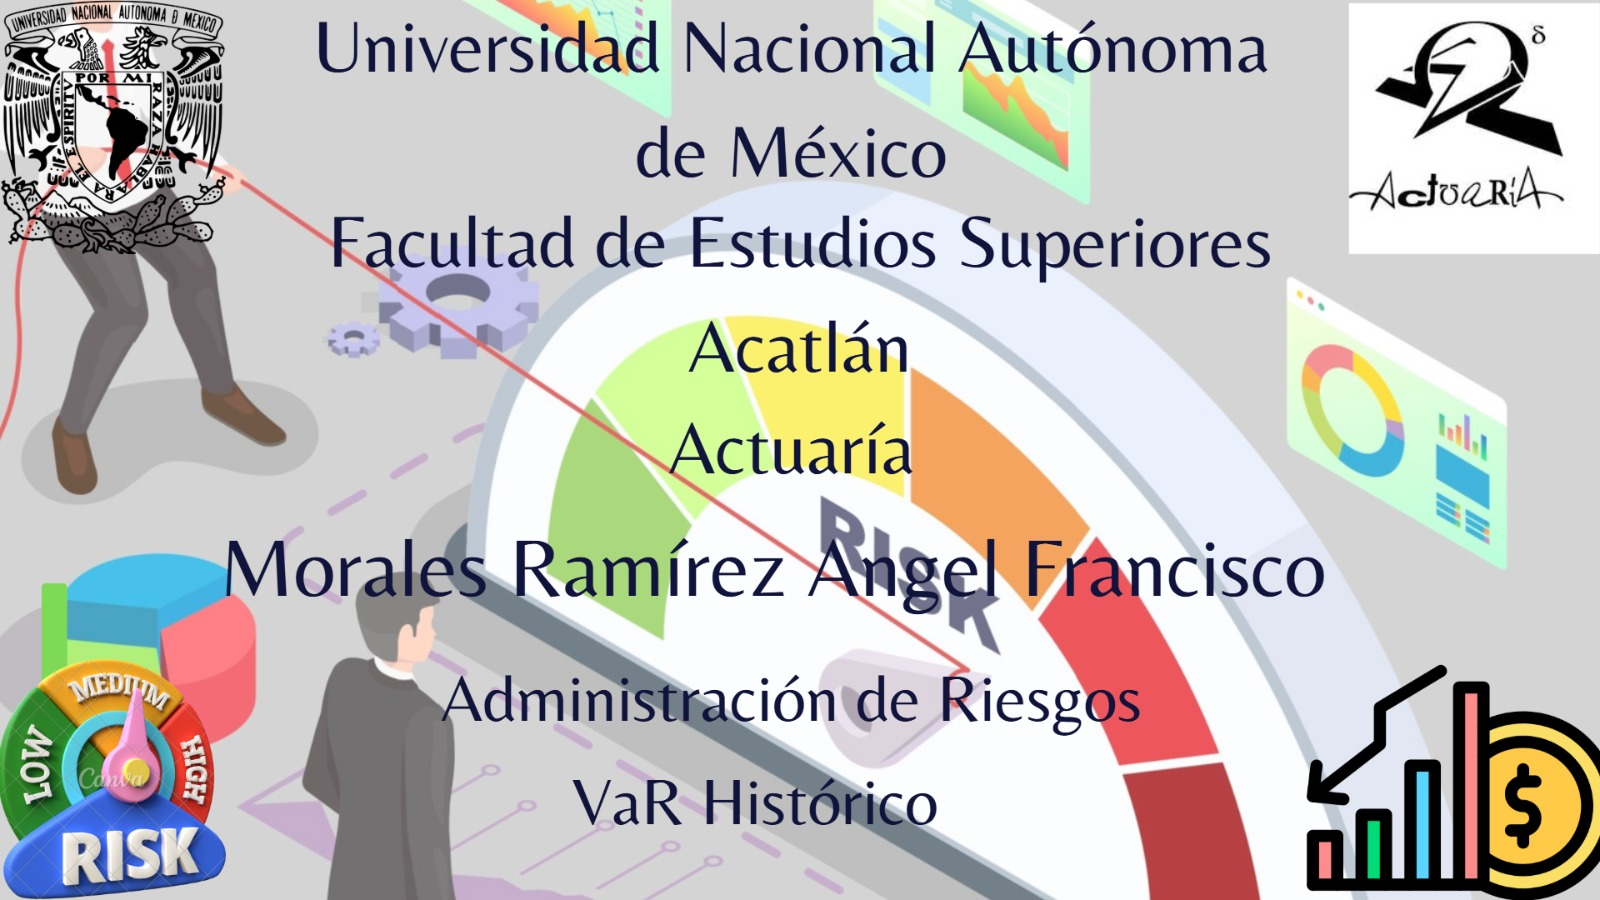

---

# Importación de librerías🐍

---


In [ ]:
import yfinance as yf #Libreria de Yahoo Finance
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import scipy.stats as stats

---

# Extracción de acciones de Yahoo Finance💹​

---

In [ ]:
#Acciones del Mercado Local
Tickers=['CEMEXCPO.MX','CUERVO.MX','LACOMERUBC.MX','GRUMAB.MX','VOLARA.MX','BIMBOA.MX','AGUA.MX']
#Titulos que forman parte del portafolio
Titules=[800,200,250,100,700,500,1000]

In [ ]:
#Función para la extracción de precios Yahoo Finance
def get_data(symbol: str):
    data=yf.download(tickers=symbol,period='253d',interval='1d')
    data.reset_index(inplace=True)
    return data

---

# Calculo de precios de cierre, rendimentos💲

---

In [ ]:
dataframes=[]
df_final=pd.DataFrame()

for Ticker in Tickers:
    #Obtener los datos con la función definida en la celda anterior
    data=get_data(Ticker)

    #Renombrar columnas por cada Ticker o Acción que forma parte de mi portafolio
    data=data.set_axis(['Date',f'Close_{Ticker}','High','Low','Open','Volume'], axis=1)

    if df_final.empty:
        df_final=data[['Date',f'Close_{Ticker}']]
    else:
        df_final=pd.merge(df_final,data[['Date',f'Close_{Ticker}']],on='Date',how='outer')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX
0,2024-03-14,14.095073,40.766117,38.554138,289.289825,12.01,70.692688,30.370001
1,2024-03-15,14.075080,40.302414,38.008186,291.044312,11.82,70.258385,29.990000
2,2024-03-19,13.905139,39.493408,38.176933,282.912628,11.43,72.795105,30.160000
3,2024-03-20,14.075080,39.424347,38.722885,287.929626,11.92,76.644615,30.030001
4,2024-03-21,14.175045,39.315819,38.593845,289.506683,12.18,75.331833,30.379999
...,...,...,...,...,...,...,...,...
248,2025-03-12,12.150000,18.379999,32.639999,364.130005,10.92,54.750000,11.330000
249,2025-03-13,11.840000,17.440001,33.389999,363.739990,10.76,55.270000,11.170000
250,2025-03-14,11.980000,18.219999,33.799999,363.579987,11.16,54.650002,11.570000
251,2025-03-18,12.140000,18.530001,34.660000,364.239990,11.39,55.930000,11.920000


In [ ]:
#Calcular los rendimientos de cada activo , con los precios de cierre del dataframe anterior
for Ticker in Tickers:
    df_final[f'Rend_{Ticker}']= df_final[f'Close_{Ticker}']/ df_final[f'Close_{Ticker}'].shift(1)-1

df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,Rend_LACOMERUBC.MX,Rend_GRUMAB.MX,Rend_VOLARA.MX,Rend_BIMBOA.MX,Rend_AGUA.MX
0,2024-03-14,14.095073,40.766117,38.554138,289.289825,12.01,70.692688,30.370001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-15,14.075080,40.302414,38.008186,291.044312,11.82,70.258385,29.990000,-0.001418,-0.011375,-0.014161,0.006065,-0.015820,-0.006144,-0.012512
2,2024-03-19,13.905139,39.493408,38.176933,282.912628,11.43,72.795105,30.160000,-0.012074,-0.020073,0.004440,-0.027940,-0.032995,0.036106,0.005669
3,2024-03-20,14.075080,39.424347,38.722885,287.929626,11.92,76.644615,30.030001,0.012221,-0.001749,0.014301,0.017733,0.042870,0.052881,-0.004310
4,2024-03-21,14.175045,39.315819,38.593845,289.506683,12.18,75.331833,30.379999,0.007102,-0.002753,-0.003332,0.005477,0.021812,-0.017128,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2025-03-12,12.150000,18.379999,32.639999,364.130005,10.92,54.750000,11.330000,0.004132,-0.011296,-0.009107,0.017691,-0.029333,0.004587,-0.008749
249,2025-03-13,11.840000,17.440001,33.389999,363.739990,10.76,55.270000,11.170000,-0.025514,-0.051142,0.022978,-0.001071,-0.014652,0.009498,-0.014122
250,2025-03-14,11.980000,18.219999,33.799999,363.579987,11.16,54.650002,11.570000,0.011824,0.044725,0.012279,-0.000440,0.037175,-0.011218,0.035810
251,2025-03-18,12.140000,18.530001,34.660000,364.239990,11.39,55.930000,11.920000,0.013356,0.017014,0.025444,0.001815,0.020609,0.023422,0.030251


---

# Calculo de precios de precios simulados, perdidas y ganancias💰

---

In [ ]:
#Calcular precios simulados con la información histórica
for Ticker in Tickers:
    #Obtener el último precio para cada Acción
    ultimo_precio=df_final[f'Close_{Ticker}'].iloc[-1]
    #Calcular los precios simulados con la información histórica
    df_final[f'Precio_Sim{Ticker}']=ultimo_precio*(1+ df_final[f'Rend_{Ticker}'])
df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,...,Rend_VOLARA.MX,Rend_BIMBOA.MX,Rend_AGUA.MX,Precio_SimCEMEXCPO.MX,Precio_SimCUERVO.MX,Precio_SimLACOMERUBC.MX,Precio_SimGRUMAB.MX,Precio_SimVOLARA.MX,Precio_SimBIMBOA.MX,Precio_SimAGUA.MX
0,2024-03-14,14.095073,40.766117,38.554138,289.289825,12.01,70.692688,30.370001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-15,14.075080,40.302414,38.008186,291.044312,11.82,70.258385,29.990000,-0.001418,-0.011375,...,-0.015820,-0.006144,-0.012512,12.252596,17.765596,34.484660,369.205673,11.396802,55.109342,11.662229
2,2024-03-19,13.905139,39.493408,38.176933,282.912628,11.43,72.795105,30.160000,-0.012074,-0.020073,...,-0.032995,0.036106,0.005669,12.121854,17.609281,35.135302,356.726709,11.197919,57.452056,11.876946
3,2024-03-20,14.075080,39.424347,38.722885,287.929626,11.92,76.644615,30.030001,0.012221,-0.001749,...,0.042870,0.052881,-0.004310,12.419958,17.938576,35.480233,373.487808,12.076430,58.382277,11.759096
4,2024-03-21,14.175045,39.315819,38.593845,289.506683,12.18,75.331833,30.379999,0.007102,-0.002753,...,0.021812,-0.017128,0.011655,12.357145,17.920531,34.863433,368.990045,11.832584,54.500244,11.947646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2025-03-12,12.150000,18.379999,32.639999,364.130005,10.92,54.750000,11.330000,0.004132,-0.011296,...,-0.029333,0.004587,-0.008749,12.320702,17.767002,34.661421,373.472436,11.240320,55.704359,11.706675
249,2025-03-13,11.840000,17.440001,33.389999,363.739990,10.76,55.270000,11.170000,-0.025514,-0.051142,...,-0.014652,0.009498,-0.014122,11.956939,17.050969,35.783768,366.586944,11.410330,55.976650,11.643222
250,2025-03-14,11.980000,18.219999,33.799999,363.579987,11.16,54.650002,11.570000,0.011824,0.044725,...,0.037175,-0.011218,0.035810,12.415084,18.773702,35.409523,366.818582,12.010483,54.827983,12.232919
251,2025-03-18,12.140000,18.530001,34.660000,364.239990,11.39,55.930000,11.920000,0.013356,0.017014,...,0.020609,0.023422,0.030251,12.433874,18.275747,35.870024,367.646187,11.818656,56.748737,12.167261


In [ ]:
#Calcular las pérdidas y ganancias para cada activo y las del portafolio
i=0
df_final['Portafolio']=0
for Ticker in Tickers:
     #Obtener el último precio para cada Acción
     ultimo_precio=df_final[f'Close_{Ticker}'].iloc[-1]
     df_final[f'Perd_Gan_{Ticker}']=(df_final[f'Precio_Sim{Ticker}']-ultimo_precio)*Titules[i]
     df_final['Portafolio']=df_final['Portafolio']+df_final[f'Perd_Gan_{Ticker}']
     i=i+1

df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Rend_CEMEXCPO.MX,Rend_CUERVO.MX,...,Precio_SimBIMBOA.MX,Precio_SimAGUA.MX,Portafolio,Perd_Gan_CEMEXCPO.MX,Perd_Gan_CUERVO.MX,Perd_Gan_LACOMERUBC.MX,Perd_Gan_GRUMAB.MX,Perd_Gan_VOLARA.MX,Perd_Gan_BIMBOA.MX,Perd_Gan_AGUA.MX
0,2024-03-14,14.095073,40.766117,38.554138,289.289825,12.01,70.692688,30.370001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-15,14.075080,40.302414,38.008186,291.044312,11.82,70.258385,29.990000,-0.001418,-0.011375,...,55.109342,11.662229,-402.412116,-13.923278,-40.880741,-123.834925,222.566183,-128.238492,-170.329620,-147.771243
2,2024-03-19,13.905139,39.493408,38.176933,282.912628,11.43,72.795105,30.160000,-0.012074,-0.020073,...,57.452056,11.876946,-376.648921,-118.517296,-72.143731,38.825637,-1025.330208,-267.456439,1001.027435,66.945681
3,2024-03-20,14.075080,39.424347,38.722885,287.929626,11.92,76.644615,30.030001,0.012221,-0.001749,...,58.382277,11.759096,2652.253534,119.965749,-6.284751,125.058468,650.779748,347.501138,1466.138027,-50.904846
4,2024-03-21,14.175045,39.315819,38.593845,289.506683,12.18,75.331833,30.379999,0.007102,-0.002753,...,54.500244,11.947646,71.259299,69.715939,-9.893635,-29.141752,201.003405,176.808878,-474.878624,137.645089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2025-03-12,12.150000,18.379999,32.639999,364.130005,10.92,54.750000,11.330000,0.004132,-0.011296,...,55.704359,11.706675,355.637841,40.561365,-40.599437,-79.644608,649.242543,-237.775943,127.178901,-103.324979
249,2025-03-13,11.840000,17.440001,33.389999,363.739990,10.76,55.270000,11.170000,-0.025514,-0.051142,...,55.976650,11.643222,-294.842633,-250.448968,-183.806044,200.942097,-39.306725,-118.769116,263.324436,-166.778312
250,2025-03-14,11.980000,18.219999,33.799999,363.579987,11.16,54.650002,11.570000,0.011824,0.044725,...,54.827983,12.232919,781.292730,116.067064,160.740563,107.380913,-16.142890,301.337994,-311.009055,422.918141
251,2025-03-18,12.140000,18.530001,34.660000,364.239990,11.39,55.930000,11.920000,0.013356,0.017014,...,56.748737,12.167261,1655.060518,131.099164,61.149557,222.506077,66.617570,167.059501,649.368081,357.260567


---
  # **VaR al 99%**👨‍🎓
  ---

In [ ]:
VaR_99=df_final['Portafolio'].quantile(0.01)
VaR_99

np.float64(-3134.5990023757013)

---
  # **Histograma**🎨
  ---

In [ ]:
dfpl=df_final[:]
#Calcular los parametros de la distribucion Normal Teórica
media = dfpl['Portafolio'].mean()
volatilidad= dfpl['Portafolio'].std()

#Crear el prefijo para mi gráfico
fig=go.Figure()

#Crear el gráfico
fig.add_trace(go.Histogram(x=dfpl['Portafolio'],
                           nbinsx=50,
                           marker_color='skyblue',
                           opacity=0.75,
                           name='Datos Reales'))

#Generar la distribución normal teórica
x=np.linspace(dfpl['Portafolio'].min(),dfpl['Portafolio'].max(),100)
y=stats.norm.pdf(x,media,volatilidad)

#Escalamiento para la función de distribución teórica
bin_pdf=(dfpl['Portafolio'].max()-dfpl['Portafolio'].min())/50
y_scaled=y*bin_pdf*len(dfpl)

#Añadir al gráfico anterior de barras
fig.add_trace(go.Scatter(x=x,y=y_scaled,
                         mode='lines',
                         name='Distribución Normal',
                         line=dict(color='green', width=2, dash='dash')))

#Añadir una lineal vertical que señale el VaR
fig.add_shape(go.layout.Shape(type='line',
                              x0=VaR_99,
                              y0=0,
                              x1=VaR_99,
                              y1=max(y_scaled),
                              line=dict(color='red',width=3, dash='dash')))



#Mostrar Gráfico
fig.show()